In [1]:
import pandas as pd
import numpy as np

In [2]:
wp_master = pd.read_csv('../data/osstate/waypoints_master.csv')
print('There are {} waypoints in the master list'.format(len(wp_master)))

There are 442339 waypoints in the master list


In [28]:
from sklearn.cluster import DBSCAN

# Prepare the coordinates
coords = wp_master[['lat', 'lon']].values

# Define DBSCAN with a custom distance metric
kms_per_radian = 6371.0088
epsilon = 20 / kms_per_radian  # km radius for each cluster

db = DBSCAN(eps=epsilon, min_samples=int(15), algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

wp_master['cluster_id'] = db.labels_

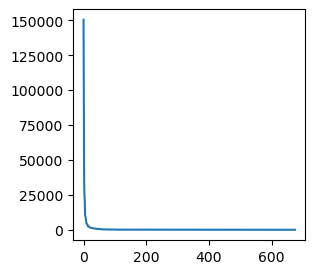

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.plot(wp_master['cluster_id'].value_counts().values.tolist())

In [30]:
# Create wp_lite by sampling a random number of rows from wp_master
wp_lite = wp_master.sample(frac=0.1, random_state=1)

In [31]:
wp_lite['cluster_id'].value_counts()

cluster_id
 0      14975
 3       8291
-1       3268
 5       2369
 6       2036
        ...  
 513        1
 380        1
 533        1
 132        1
 428        1
Name: count, Length: 623, dtype: int64

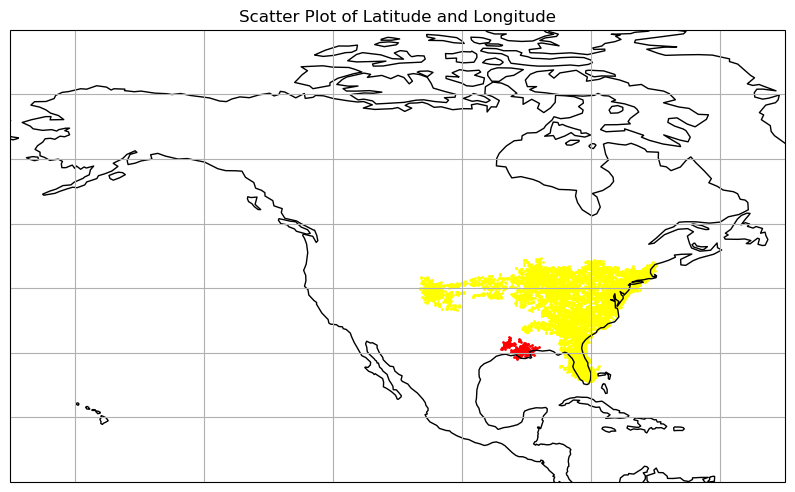

In [32]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Change the color according to cluster_id
colors = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink']  # Add more colors if needed
for cluster_id, color in zip(wp_lite['cluster_id'].unique(), colors):
    cluster_data = wp_lite[wp_lite['cluster_id'] == cluster_id]
    ax.scatter(cluster_data['lon'], cluster_data['lat'], color=color, s=1, transform=ccrs.PlateCarree())


# Set the map extent
ax.set_extent([-170, -50, 10, 80], crs=ccrs.PlateCarree())


# Add map features
ax.coastlines()
ax.gridlines()

# Set plot title and labels
ax.set_title('Scatter Plot of Latitude and Longitude')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


# Show the plot
plt.show()